In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np




In [2]:
(X_train,y_train),(X_test,y_test) =datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train=y_train.reshape(-1,)

In [4]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X,y,index):

    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y_train[index]])




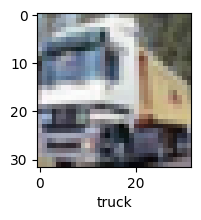

In [5]:
plot_sample(X_train,y_train,1)

In [6]:
X_train=X_train/255
X_test=X_test/255


In [7]:
ann=model=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])
ann.compile(optimizer="SGD",
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

c:\Users\RIDHIMA GUPTA\Desktop\MLAI\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.3039 - loss: 1.9321
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4215 - loss: 1.6386
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4540 - loss: 1.5528
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4780 - loss: 1.4903
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4942 - loss: 1.4376


In [8]:
ann.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4740 - loss: 1.4765


[1.479272723197937, 0.47360000014305115]

In [9]:
ann.predict(X_test[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.24257384, 0.82540584, 0.5181329 , 0.9022749 , 0.44610885,
        0.7809425 , 0.70654964, 0.09661584, 0.71227956, 0.21736264]],
      dtype=float32)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n" , classification_report(y_test,y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.66      0.44      0.53      1000
           1       0.45      0.74      0.56      1000
           2       0.52      0.09      0.15      1000
           3       0.34      0.29      0.31      1000
           4       0.40      0.46      0.43      1000
           5       0.38      0.40      0.39      1000
           6       0.50      0.55      0.53      1000
           7       0.55      0.53      0.54      1000
           8       0.61      0.61      0.61      1000
           9       0.44      0.63      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [11]:
cnn=keras.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=364,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])


c:\Users\RIDHIMA GUPTA\Desktop\MLAI\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 69ms/step - accuracy: 0.3983 - loss: 1.6521
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.6350 - loss: 1.0516
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6961 - loss: 0.8850
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7351 - loss: 0.7669
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7722 - loss: 0.6686
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7948 - loss: 0.5858
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8263 - loss: 0.5008
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.8496 - loss: 0.4346
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.8747 - loss: 0.3665
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.8893 - loss: 0.3239


In [14]:

y_pred2=cnn.predict(X_test)
y_pred_classes2=[np.argmax(element) for element in y_pred2]
print("classification report: \n" , classification_report(y_test,y_pred_classes2))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.75      1000
           1       0.90      0.75      0.82      1000
           2       0.65      0.55      0.59      1000
           3       0.51      0.57      0.54      1000
           4       0.70      0.64      0.67      1000
           5       0.57      0.70      0.63      1000
           6       0.77      0.80      0.78      1000
           7       0.74      0.77      0.76      1000
           8       0.86      0.79      0.82      1000
           9       0.76      0.87      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000



In [15]:
#Padding and stride:
#Vaild convolution, SameConvolution: padding='same' .adding:for corner pizels to participate well in featue detection
